<a href="https://colab.research.google.com/github/KSaiNihal/House_Price_predection/blob/main/House_Price_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Projects/House Price Predection/Melbourne_housing_FULL.csv")

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
missValue = (df.isna().mean()*100).round(2)
missValue

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.83
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         23.57
Bathroom         23.60
Car              25.04
Landsize         33.88
BuildingArea     60.58
YearBuilt        55.39
CouncilArea       0.01
Lattitude        22.88
Longtitude       22.88
Regionname        0.01
Propertycount     0.01
dtype: float64

In [ ]:
df.duplicated().sum()

1

Cleaning Data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
colRevisi = ['YearBuilt', 'Bathroom', 'Postcode', 'Bedroom2', 'Car','Propertycount']
df[colRevisi] = df[colRevisi].astype('Int64', errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  Int64         
 10  Bedroom2       26640 non-null  Int64         
 11  Bathroom       26631 non-null  Int64         
 12  Car            26129 non-null  Int64         
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

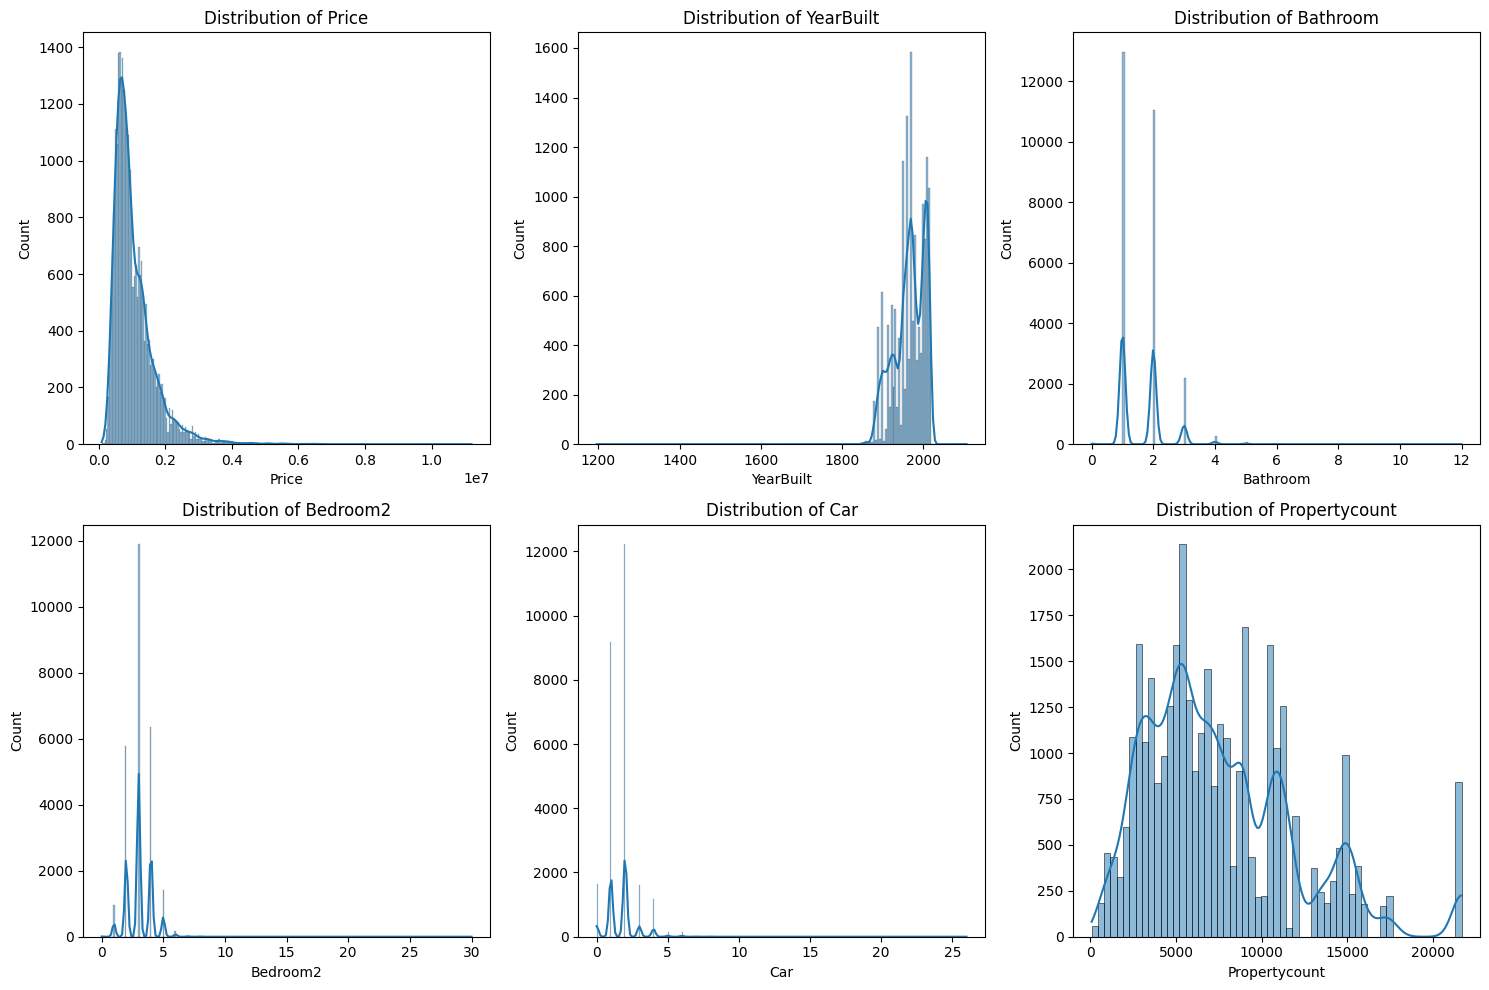

In [ ]:
def hisPlot(df, columns):
  nRows = (len(columns) + 2) // 3
  plt.figure(figsize=(15, nRows*5))

  for i, column in enumerate(columns, 1):
    plt.subplot(nRows, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

  plt.tight_layout()
  plt.show()

hisCol = ['Price', 'YearBuilt', 'Bathroom', 'Bedroom2', 'Car', 'Propertycount']
hisPlot(df, hisCol)

In [ ]:
# df['Price'].fillna(df['Price'].median(),inplace=True)
# df['Bedroom2'].fillna(df['Bedroom2'].median(),inplace=True)
# df['Bathroom'].fillna(df['Bathroom'].median(),inplace=True)
# df['Car'].fillna(df['Car'].median(),inplace=True)
# df['Lattitude'].fillna(df['Lattitude'].median(),inplace=True)
# df['Longtitude'].fillna(df['Longtitude'].median(),inplace=True)

In [ ]:
# df['Landsize'].fillna(df['Landsize'].mean(),inplace=True)
# df['BuildingArea'].fillna(df['BuildingArea'].mean(),inplace=True)
# df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace =True)

In [ ]:
df.dropna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,1,0,156.0,79.0,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,2,0,134.0,150.0,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,...,1,2,120.0,142.0,2014,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,...,2,0,245.0,210.0,1910,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,...,1,2,256.0,107.0,1890,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,2018-02-24,25.5,3750,...,2,2,383.0,118.0,2016,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3750,...,2,2,404.0,158.0,2012,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013,...,2,1,98.0,104.0,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013,...,1,2,220.0,120.0,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543


In [ ]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df['Rooms'] = df['Rooms'].astype('int64')

In [ ]:
df.drop_duplicates(inplace =True)

In [ ]:
dropcolMiss = ['Distance', 'Postcode',
              'CouncilArea', 'Regionname', 'Propertycount']

In [ ]:
df.dropna(subset = dropcolMiss, inplace= True)

In [ ]:
#you can do eda here

In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067,...,126.0,NaN,<NA>,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019,9,2016
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,...,202.0,NaN,<NA>,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019,12,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,2,2016
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067,...,0.0,NaN,<NA>,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019,2,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,3,2017


In [ ]:
def getSeason(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = df['Date'].dt.month.apply(getSeason)

In [ ]:
df['Season'].unique()

array(['Autumn', 'Winter', 'Spring', 'Summer'], dtype=object)

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Month', 'Year', 'Season'],
      dtype='object')

In [ ]:
df["Year_science"]=df["YearBuilt"]-df["Year"]

In [ ]:
df.drop(columns=["Date",'Year', 'Month', 'Lattitude', 'Longtitude', 'YearBuilt'], inplace=True)

In [ ]:
# Apply Label Encoding to the categorical columns
categorical_cols=[ 'Method', 'Postcode', 'Regionname','CouncilArea','Suburb', 'Address','Type','SellerG','Season']
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the encoded dataframe after Label Encoding
print("DataFrame after Label Encoding:")
print(df.head())

DataFrame after Label Encoding:
   Suburb  Address  Rooms  Type      Price  Method  SellerG  Distance  \
0       0    29455      2     0        NaN       6      155       2.5   
1       0    32509      2     0  1480000.0       2       33       2.5   
2       0    15386      2     0  1035000.0       2       33       2.5   
3       0     9767      3     2        NaN       7      296       2.5   
4       0    25125      3     0  1465000.0       5       33       2.5   

   Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  CouncilArea  \
0        53         2         1    1     126.0           NaN           31   
1        53         2         1    1     202.0           NaN           31   
2        53         2         1    0     156.0          79.0           31   
3        53         3         2    1       0.0           NaN           31   
4        53         3         2    0     134.0         150.0           31   

   Regionname  Propertycount  Season  Year_science  
0           2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34853 non-null  int64  
 1   Address        34853 non-null  int64  
 2   Rooms          34853 non-null  int64  
 3   Type           34853 non-null  int64  
 4   Price          27244 non-null  float64
 5   Method         34853 non-null  int64  
 6   SellerG        34853 non-null  int64  
 7   Distance       34853 non-null  float64
 8   Postcode       34853 non-null  int64  
 9   Bedroom2       26639 non-null  Int64  
 10  Bathroom       26630 non-null  Int64  
 11  Car            26128 non-null  Int64  
 12  Landsize       23046 non-null  float64
 13  BuildingArea   13741 non-null  float64
 14  CouncilArea    34853 non-null  int64  
 15  Regionname     34853 non-null  int64  
 16  Propertycount  34853 non-null  Int64  
 17  Season         34853 non-null  int64  
 18  Year_scienc

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame without the "Price" column
df_scaled = df.drop(columns=["Price"]).copy()

# Scale the features
scaler = StandardScaler()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])

# Add the "Price" column back to the scaled DataFrame
df_scaled["Price"] = df["Price"]

# Now df_scaled contains scaled features with the "Price" column intact


###Model Evaluation

Train Test Split

In [ ]:
X = df.drop(columns=['Price'])  # Drop the 'Price' column to get the feature matrix
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Calculate metrics
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr_train = r2_score(y_train, lr.predict(X_train))
r2_lr = r2_score(y_test, y_pred_lr)

# Check for overfitting
overfitting_lr = r2_lr_train > r2_lr
print("Linear Regression Train R-squared Score:", r2_lr_train)
print("Linear Regression Test R-squared Score:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MSE:", mse_lr)
print("Is there overfitting?", overfitting_lr)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge.predict(X_test)

# Calculate metrics
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge_train = r2_score(y_train, ridge.predict(X_train))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Check for overfitting
overfitting_ridge = r2_ridge_train > r2_ridge
print("Ridge Regression Train R-squared Score:", r2_ridge_train)
print("Ridge Regression Test R-squared Score:", r2_ridge)
print("Ridge Regression RMSE:", rmse_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Is there overfitting in Ridge Regression?", overfitting_ridge)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test have been defined and scaled previously

# Create and fit the Lasso Regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso.predict(X_test)

# Calculate metrics
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso_train = r2_score(y_train, lasso.predict(X_train))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Check for overfitting
overfitting_lasso = r2_lasso_train > r2_lasso
print("Lasso Regression Train R-squared Score:", r2_lasso_train)
print("Lasso Regression Test R-squared Score:", r2_lasso)
print("Lasso Regression RMSE:", rmse_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Is there overfitting in Lasso Regression?", overfitting_lasso)


In [ ]:
X.columns

Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Calculate metrics
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt_train = r2_score(y_train, dt.predict(X_train))
r2_dt = r2_score(y_test, y_pred_dt)

# Check for overfitting
overfitting_dt = r2_dt_train > r2_dt
print("Decision Tree Train R-squared Score:", r2_dt_train)
print("Decision Tree Test R-squared Score:", r2_dt)
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree MSE:", mse_dt)
print("Is there overfitting?", overfitting_dt)


In [ ]:
# Decision Tree with Regularization
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model with regularization parameters
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=5)
dt_reg.fit(X_train, y_train)

# Predict on test set
y_pred_dt_reg = dt_reg.predict(X_test)

# Calculate metrics
rmse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg, squared=False)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
r2_dt_reg_train = r2_score(y_train, dt_reg.predict(X_train))
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)

# Check for overfitting
overfitting_dt_reg = r2_dt_reg_train > r2_dt_reg
print("Decision Tree with Regularization Train R-squared Score:", r2_dt_reg_train)
print("Decision Tree with Regularization Test R-squared Score:", r2_dt_reg)
print("Decision Tree with Regularization RMSE:", rmse_dt_reg)
print("Decision Tree with Regularization MSE:", mse_dt_reg)
print("Is there overfitting in Decision Tree with Regularization?", overfitting_dt_reg)


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.tree import DecisionTreeRegressor

# # Define the extended hyperparameter grid for Decision Tree
# param_grid_dt_extended = {
#     'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
#     'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
#     'min_samples_leaf': [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# }

# # Create the RandomizedSearchCV object for Decision Tree with extended grid
# dt_random_extended = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42),
#                                        param_distributions=param_grid_dt_extended,
#                                        n_iter=100,
#                                        scoring='neg_mean_squared_error',
#                                        cv=5,
#                                        random_state=42)

# # Fit the RandomizedSearchCV object to the data
# dt_random_extended.fit(X_train, y_train)

# # Get the best parameters for Decision Tree with extended grid
# best_params_dt_extended = dt_random_extended.best_params_
# print("Best Parameters for Decision Tree with Extended Grid:", best_params_dt_extended)

# # Predict on test set with best parameters
# y_pred_dt_tuned_extended = dt_random_extended.predict(X_test)

# # Calculate metrics with tuned parameters
# rmse_dt_tuned_extended = mean_squared_error(y_test, y_pred_dt_tuned_extended, squared=False)
# mse_dt_tuned_extended = mean_squared_error(y_test, y_pred_dt_tuned_extended)
# r2_dt_tuned_extended_train = r2_score(y_train, dt_random_extended.predict(X_train))
# r2_dt_tuned_extended = r2_score(y_test, y_pred_dt_tuned_extended)

# # Check for overfitting with tuned parameters
# overfitting_dt_tuned_extended = r2_dt_tuned_extended_train > r2_dt_tuned_extended
# print("Decision Tree Train R-squared Score with Tuned Parameters (Extended Grid):", r2_dt_tuned_extended_train)
# print("Decision Tree Test R-squared Score with Tuned Parameters (Extended Grid):", r2_dt_tuned_extended)
# print("Decision Tree RMSE with Tuned Parameters (Extended Grid):", rmse_dt_tuned_extended)
# print("Decision Tree MSE with Tuned Parameters (Extended Grid):", mse_dt_tuned_extended)
# print("Is there overfitting in Decision Tree with Tuned Parameters (Extended Grid)?", overfitting_dt_tuned_extended)


Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create and fit the model
rf = RandomForestRegressor(n_estimators= 400, min_samples_split=  4, min_samples_leaf= 3, max_depth= None)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Calculate metrics
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf_train = r2_score(y_train, rf.predict(X_train))
r2_rf = r2_score(y_test, y_pred_rf)

# Check for overfitting
overfitting_rf = r2_rf_train > r2_rf
print("Random Forest Train R-squared Score:", r2_rf_train)
print("Random Forest Test R-squared Score:", r2_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MSE:", mse_rf)
print("Is there overfitting?", overfitting_rf)


In [ ]:
# Random Forest with Regularization
from sklearn.ensemble import RandomForestRegressor

# Create and fit the model with regularization parameters
# {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}  by hyperparameter tunning
rf_reg = RandomForestRegressor( n_estimators= 400, min_samples_split=  3, min_samples_leaf= 3, max_depth= None)
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Calculate metrics
rmse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg, squared=False)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg_train = r2_score(y_train, rf_reg.predict(X_train))
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Check for overfitting
overfitting_rf_reg = r2_rf_reg_train > r2_rf_reg
print("Random Forest with Regularization Train R-squared Score:", r2_rf_reg_train)
print("Random Forest with Regularization Test R-squared Score:", r2_rf_reg)
print("Random Forest with Regularization RMSE:", rmse_rf_reg)
print("Random Forest with Regularization MSE:", mse_rf_reg)
print("Is there overfitting in Random Forest with Regularization?", overfitting_rf_reg)


Hyper Parameter Tunning for Random forest

In [ ]:
# # Define the hyperparameter grid
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 5, 10]
# }

# # Create the RandomizedSearchCV object
# rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
#                                param_distributions=param_grid_rf,
#                                n_iter=100,
#                                scoring='neg_mean_squared_error',
#                                cv=5,
#                                random_state=42)

# # Fit the RandomizedSearchCV object to the data
# rf_random.fit(X_train, y_train)

# # Get the best parameters
# best_params_rf = rf_random.best_params_
# print("Best Parameters for Random Forest:", best_params_rf)

# # Predict on test set with best parameters
# y_pred_rf_tuned = rf_random.predict(X_test)

# # Calculate metrics with tuned parameters
# rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
# mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
# r2_rf_tuned_train = r2_score(y_train, rf_random.predict(X_train))
# r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# # Check for overfitting with tuned parameters
# overfitting_rf_tuned = r2_rf_tuned_train > r2_rf_tuned
# print("Random Forest Train R-squared Score with Tuned Parameters:", r2_rf_tuned_train)
# print("Random Forest Test R-squared Score with Tuned Parameters:", r2_rf_tuned)
# print("Random Forest RMSE with Tuned Parameters:", rmse_rf_tuned)
# print("Random Forest MSE with Tuned Parameters:", mse_rf_tuned)
# print("Is there overfitting in Random Forest with Tuned Parameters?", overfitting_rf_tuned)



KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on train and test sets
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

# Calculate metrics for train set
rmse_train_knn = mean_squared_error(y_train, y_pred_train_knn, squared=False)
r2_train_knn = r2_score(y_train, y_pred_train_knn)

# Calculate metrics for test set
rmse_test_knn = mean_squared_error(y_test, y_pred_test_knn, squared=False)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

# Check for overfitting
overfitting_knn = r2_train_knn > r2_test_knn

# Print the results
print("KNN Train R-squared Score:", r2_train_knn)
print("KNN Test R-squared Score:", r2_test_knn)
print("KNN RMSE:", rmse_test_knn)
print("KNN MSE:", mean_squared_error(y_test, y_pred_test_knn))
print("Is there overfitting in KNN?", overfitting_knn)


In [ ]:
from sklearn.svm import SVR

# Create and train the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on train and test sets
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Calculate metrics for train set
rmse_train_svm = mean_squared_error(y_train, y_pred_train_svm, squared=False)
r2_train_svm = r2_score(y_train, y_pred_train_svm)

# Calculate metrics for test set
rmse_test_svm = mean_squared_error(y_test, y_pred_test_svm, squared=False)
r2_test_svm = r2_score(y_test, y_pred_test_svm)

# Check for overfitting
overfitting_svm = r2_train_svm > r2_test_svm

# Print the results
print("SVM Train R-squared Score:", r2_train_svm)
print("SVM Test R-squared Score:", r2_test_svm)
print("SVM RMSE:", rmse_test_svm)
print("SVM MSE:", mean_squared_error(y_test, y_pred_test_svm))
print("Is there overfitting in SVM?", overfitting_svm)


XGBoost

In [ ]:
import xgboost as xgb

# Best parameters obtained from grid search
best_params = {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

# XGBoost model with tuned hyperparameters
xgb_model_tuned = xgb.XGBRegressor(**best_params, random_state=42)
xgb_model_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test)

# Calculate metrics for tuned XGBoost model
rmse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned, squared=False)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_train_tuned = r2_score(y_train, xgb_model_tuned.predict(X_train))
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Check for overfitting in tuned XGBoost model
overfitting_xgb_tuned = r2_xgb_train_tuned > r2_xgb_tuned
print("Tuned XGBoost Train R-squared Score:", r2_xgb_train_tuned)
print("Tuned XGBoost Test R-squared Score:", r2_xgb_tuned)
print("Tuned XGBoost RMSE:", rmse_xgb_tuned)
print("Tuned XGBoost MSE:", mse_xgb_tuned)
print("Is there overfitting in tuned XGBoost?", overfitting_xgb_tuned)


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor
# from sklearn.metrics import make_scorer, r2_score
# import multiprocessing

# # Define the parameter grid for tuning
# param_grid = {
#     'learning_rate': [0.05, 0.1, 0.15],
#     'max_depth': [3, 4, 5, 6],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'n_estimators': [100, 200, 300]
# }

# # Create the XGBoost model
# xgb_model = XGBRegressor(random_state=42)

# # Define custom scorer for GridSearchCV
# scorer = make_scorer(r2_score)

# # Number of CPUs to use for parallel processing
# n_cpus = multiprocessing.cpu_count()

# # Randomized Search Cross Validation
# random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
#                                    n_iter=100, cv=5, scoring=scorer, verbose=1,
#                                    n_jobs=n_cpus)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters:", random_search.best_params_)

# # Best score achieved
# print("Best R-squared Score:", random_search.best_score_)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
from sklearn.metrics import r2_score
from keras.optimizers import RMSprop

# Create a Sequential model
model_ann = Sequential()

# Add input layer and hidden layers
model_ann.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model_ann.add(Dense(units=128, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))  # Additional hidden layer
model_ann.add(Dense(units=128, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))   # Additional hidden layer
model_ann.add(Dense(units=64, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))   # Additional hidden layer
model_ann.add(Dense(units=32, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'))
# Add output layer
model_ann.add(Dense(units=1, activation='linear'))  # Assuming it's a regression problem

# Compile the model
model_ann.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse', 'mae'])

# Fit the model to the training data
history = model_ann.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mse, mae = model_ann.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on Test Data:", mse)
print("Mean Absolute Error on Test Data:", mae)

# Predict on test set
y_pred_ann = model_ann.predict(X_test)

# Calculate R-squared score for test data
r2_ann_test = r2_score(y_test, y_pred_ann)
print("R-squared Score on Test Data:", r2_ann_test)

# Predict on train set
y_pred_ann_train = model_ann.predict(X_train)

# Calculate R-squared score for train data
r2_ann_train = r2_score(y_train, y_pred_ann_train)
print("R-squared Score on Train Data:", r2_ann_train)


In [ ]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam, RMSprop
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from keras.callbacks import EarlyStopping

# # Define the function to create and compile the Keras model
# def create_model(units=64, activation='relu', optimizer='adam', learning_rate=0.01):
#     model = Sequential()
#     model.add(Dense(units=units, activation=activation, input_dim=X_train.shape[1]))
#     model.add(Dense(units=units, activation=activation))
#     model.add(Dense(units=1, activation='linear'))
#     model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mean_squared_error')
#     return model

# # Define hyperparameter grid
# param_grid = {
#     'units': [32, 64, 128],
#     'activation': ['relu', 'tanh'],
#     'optimizer': [Adam, RMSprop],
#     'learning_rate': [0.01, 0.001]
# }

# best_rmse = float('inf')
# best_params = {}

# # Perform grid search
# for units in param_grid['units']:
#     for activation in param_grid['activation']:
#         for optimizer in param_grid['optimizer']:
#             for learning_rate in param_grid['learning_rate']:
#                 model = create_model(units=units, activation=activation, optimizer=optimizer, learning_rate=learning_rate)
#                 model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2, callbacks=[EarlyStopping(patience=10)])
#                 y_pred = model.predict(X_test)
#                 rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#                 if rmse < best_rmse:
#                     best_rmse = rmse
#                     best_params = {'units': units, 'activation': activation, 'optimizer': optimizer, 'learning_rate': learning_rate}

# # Best parameters found
# print("Best parameters:", best_params)

# # Best RMSE achieved
# print("Best RMSE:", best_rmse)
